# Overview

In this notebook, we'll be building a system that can read the data from a PDF or PNG file and then create a structured json payload, which we predefined its structure.

# Set up

In [ ]:
import os
from dotenv import load_dotenv; load_dotenv()

%load_ext autoreload
%autoreload 2

# Data model

We will be using Pydantic to define a data model, including fields and types, for the json payload extracted from a PDF/PNG file.

In [ ]:
from pydantic import BaseModel

In [ ]:
class Restaurant(BaseModel):
    """Data model for an restaurant."""
    restaurant: str
    food: str
    discount: str
    price: str
    rating: str
    review: str

# Load data

In [ ]:
from llama_index.core import SimpleDirectoryReader

In [ ]:
# Load images from the directory
image_documents = SimpleDirectoryReader("../data/restaurant_images").load_data()
image_documents

[ImageDocument(id_='ba0c7e65-49cd-4a7e-a0a4-2b3e14f32edf', embedding=None, metadata={'file_path': '/Users/bcp/git/neatapp/notebooks/../data/restaurant_images/fried_chicken.png', 'file_name': 'fried_chicken.png', 'file_type': 'image/png', 'file_size': 300035, 'creation_date': '2024-03-24', 'last_modified_date': '2024-03-24'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n', image=None, image_path='/Users/bcp/git/neatapp/notebooks/../data/restaurant_images/fried_chicken.png', image_url=None, image_mimetype=None, text_embedding=None),
 ImageDocument(id_='34d54a52-b530-4cbf-8524-6b9881713d15', embedding=None, met

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

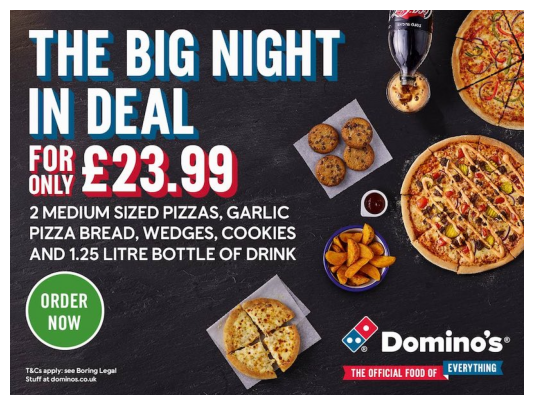

In [ ]:
# Plot a sample image
sample_image_doc = image_documents[1]
image = Image.open(sample_image_doc.metadata['file_path'])
plt.figure(figsize=(16, 5))
plt.imshow(image)
plt.axis('off')
plt.show()

# Extract data

In [ ]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

In [ ]:
# Create a GPT-4V client using a wrapper from LlamaIndex
openai_mm_llm = OpenAIMultiModal(
    model="gpt-4-vision-preview", 
    api_key=os.getenv("OPENAI_API_KEY"), 
    max_new_tokens=1000,
)

In [ ]:
# Define a prompt string for data extraction
DATA_EXTRACT_STR = """\
Can you summarize what is in the image and return the answer with json format
"""

In [ ]:
from llama_index.core.program import MultiModalLLMCompletionProgram
from llama_index.core.output_parsers import PydanticOutputParser

In [ ]:
# Create a program to generate structured outputs using Multi-modal LLM + Output Parser
program = MultiModalLLMCompletionProgram.from_defaults(
    output_parser=PydanticOutputParser(Restaurant),
    image_documents=[sample_image_doc],
    prompt_template_str=DATA_EXTRACT_STR,
    multi_modal_llm=openai_mm_llm,
    verbose=True,
)

In [ ]:
import json

In [ ]:
# Run the program and print the result
response = program()
print(json.dumps(json.loads(response.json()), indent=2))

> Raw output: ```json
{
  "restaurant": "Domino's",
  "food": "2 Medium Sized Pizzas, Garlic Pizza Bread, Wedges, Cookies",
  "discount": "The Big Night In Deal",
  "price": "£23.99",
  "rating": "Not provided",
  "review": "Not provided"
}
```
{
  "restaurant": "Domino's",
  "food": "2 Medium Sized Pizzas, Garlic Pizza Bread, Wedges, Cookies",
  "discount": "The Big Night In Deal",
  "price": "\u00a323.99",
  "rating": "Not provided",
  "review": "Not provided"
}
